# 1. Implement Your Code Below

* Here you can define and implement functions. Pay attention to the readbility of your code, e.g. choose appropriate variable name, add sufficient and clear comments, etc.

In [9]:
import pandas as pd
import numpy as np
import math

In [10]:
stocks_daily_bar = pd.read_csv('hundred_stocks_twoyears_daily_bar.csv').set_index('date')

In [11]:
def check(x,p):
    if x!=p:
        return False
    return True

In [16]:
def show_result(a,b):
    df_dummya_b= pd.DataFrame({'f=5':[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],'f=10':[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],'f=15':[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],'f=20':[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],'f=30':[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],'f=50':[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 'f=100':[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}) 
    df_dummya_b.index = ['p=5', 'p=10','p=15','p=20','p=30','p=50','p=100']
    df_dummya_b= df_dummya_b[['f=5','f=10','f=15','f=20','f=30','f=50','f=100']]
    for p in [5,10,15,20,30,50,100]:
        for f in [5,10,15,20,30,50,100]:
            point_sum=0
            point_num=0
            rate=0
            for n in range(0,100):
                try:
                    code_n=stocks_daily_bar.groupby('code').get_group(n)
                except:
                    pass
                else:
                    LMA = code_n.rolling(window=b,min_periods=b).close.mean()
                    SMA = code_n.rolling(window=a,min_periods=a).close.mean()
                    data_stocks=pd.DataFrame({'long>short': LMA-SMA>0})
                    data_stocks2=pd.DataFrame({'long<short': LMA-SMA<0})
                    pass_time=data_stocks['long>short'].rolling(window=p+1,min_periods=p+1).sum()
                    pass_time_check=pass_time.apply(lambda x: check(x,p))
                    point=code_n[(data_stocks2['long<short'])&(pass_time_check)]
                    for i in point.index:
                        R=(code_n.shift(-f).loc[i].close-code_n.loc[i].close)/code_n.loc[i].close
                        if math.isnan(R):
                            pass
                        else:
                            point_sum+=R
                            point_num+=1
            if point_num!=0:
                rate=point_sum/point_num
            df_dummya_b.loc[('p=%d'%p),('f=%d'%f)]=rate
    return df_dummya_b

# 2. Show the Result Below

* For each `(SMA, LMA)` pair, obtain the resulting dataframe, and show the dataframe result. For example:

* Show the result dataframe of 5day MA cross above 10day MA below.

In [17]:
show_result(5,10)

,f=5,f=10,f=15,f=20,f=30,f=50,f=100
p=5,-0.004063,0.002328,0.004522,0.004311,0.006923,0.011806,-0.016833
p=10,-0.009121,-0.002826,0.006242,0.005043,0.016078,0.029552,-0.008556
p=15,-0.002094,0.003623,0.024041,0.018510,0.033522,0.056647,0.029882
p=20,0.006350,0.004092,0.021276,0.032008,0.054156,0.078632,0.042356
p=30,0.013592,0.001430,0.032751,0.029489,0.013702,-0.010260,-0.035098
p=50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p=100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


* Show the result dataframe of 10day MA cross above 30day MA below.

In [20]:
show_result(10,30)

,f=5,f=10,f=15,f=20,f=30,f=50,f=100
p=5,0.000084,-0.002075,-0.002916,0.000888,0.009254,0.004183,-0.035182
p=10,0.003152,-0.001499,-0.000390,0.006950,0.016080,0.011627,-0.026532
p=15,-0.002818,-0.005540,-0.002489,0.005377,0.012176,0.009054,-0.022413
p=20,-0.004171,-0.009144,-0.005276,0.000557,0.005215,-0.001149,-0.009303
p=30,0.002050,0.000791,0.003798,0.003823,0.007697,-0.008415,0.005193
p=50,0.004851,0.001633,0.004397,-0.006640,-0.001759,-0.040447,-0.049093
p=100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


* Show other (SMA, LMA) resulting dataframes.

In [41]:
show_result(3,5)

,f=5,f=10,f=15,f=20,f=30,f=50,f=100
p=5,0.001508,0.003792,0.008803,0.011678,0.010364,0.017189,-0.013570
p=10,-0.015573,-0.011513,0.008139,0.024765,0.014262,0.042914,-0.006176
p=15,-0.033570,0.005581,0.079856,0.161983,0.103006,0.173455,0.104449
p=20,-0.022636,-0.040800,-0.019491,-0.007849,-0.022687,-0.058855,0.066276
p=30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p=50,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
p=100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
df_dummya_b=show_result(3,5)

# 3. Visualization

* Pick optimal setting $(SMA_{opt}, LMA_{opt})$, $(p_{opt}, f_{opt})$, and draw two figures aligned in one row corresponding to $(p_{opt}, .)$ and $(., f_{opt})$

In [47]:
%matplotlib inline
p_line=df_dummya_b.loc['p=15',:]
f_line=df_dummya_b.loc[:,'f=50']

In [48]:
for data in [p_line,f_line]:
    data.index.values[0]=5
    data.index.values[1]=10
    data.index.values[2]=15
    data.index.values[3]=20
    data.index.values[4]=30
    data.index.values[5]=50
    data.index.values[6]=100

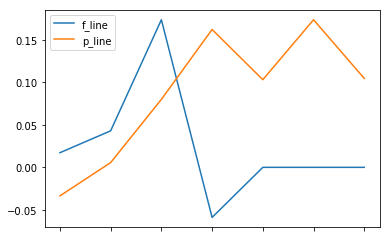

In [49]:
compare = pd.DataFrame({'p_line': p_line, 'f_line':f_line})
compare.plot()